# Greenland hospital patient survival prediction after one year of treatment

## Objective
As a data scientist in Greenland I have to solve this problem for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).
## About the dataset
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

Survived_1_year == 1, implies that the patient survived after 1 year of treatment

Train_data: [Dataset link]("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")

Test_data: [Dataset link]("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")

## Data Description:

ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

# Import Necessary libraries

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
plt.rcParams["figure.figsize"] = (12,8)
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [3]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


# Data profiling and cleaning


In [4]:
# summary
print("Rows     :",pharma_data.shape[0])
print("Columns  :",pharma_data.shape[1])
print("\nFeatures :\n",pharma_data.columns.tolist())
print("\nMissing Value    :",pharma_data.isnull().sum().sum())
print("\nColumns with missing value:\n",pharma_data.isnull().sum())

Rows     : 23097
Columns  : 18

Features :
 ['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year']

Missing Value    : 9893

Columns with missing value:
 ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [5]:
# Show the dataset details
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

Observation: This dataset contains 18 features, where data type have float, integer, object and  few columns have missing values.

## Exploration and data visualization

### Univariate Analysis.



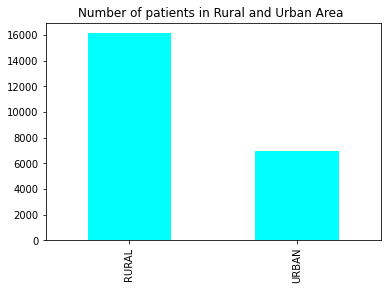

In [9]:
# Patients distribution per region.
pharma_data.Patient_Rural_Urban.value_counts().plot(kind = "bar", title = "Number of patients in Rural and Urban Area ", color ="cyan");

- observation : There is more patients in rural area compared to urban area.

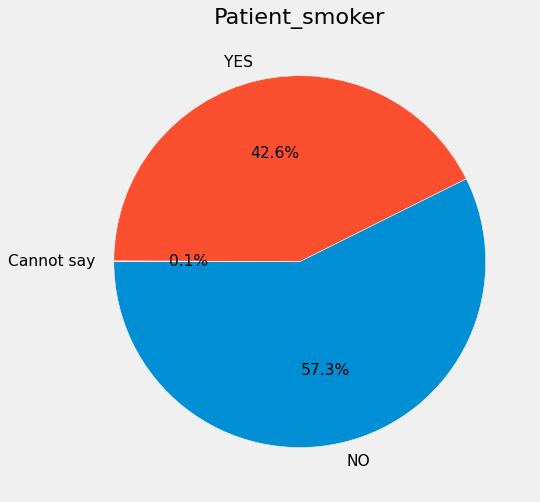

In [ ]:
# Smoking group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Patient_smoker")
g = plt.pie(pharma_data.Patient_Smoker.value_counts(), labels=pharma_data.Patient_Smoker.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

- Observation: About more than half amount of patient do not smoke, 42.6% patient are smoker and only 0.1% neither smoke or smoke, cannot identified.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


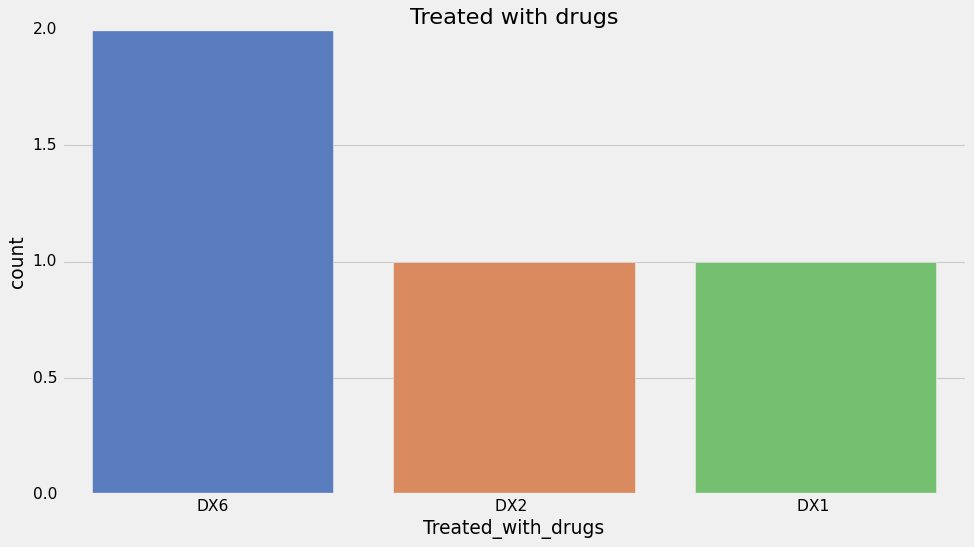

In [ ]:
# Treated with drugs
plt.figure(figsize=(13,7))
plt.title("Treated with drugs")
sns.countplot(pharma_data.Treated_with_drugs[:5], palette="muted")
fig = plt.gcf()
plt.show();

- Observation: DX6 drug works best among other drugs.

### Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


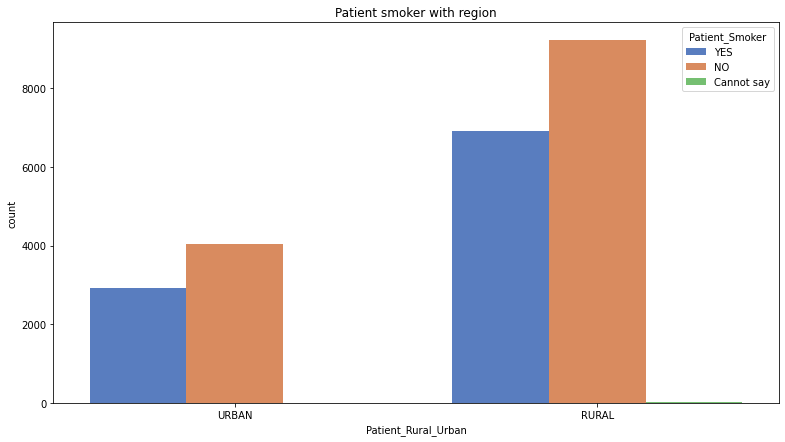

In [10]:
# Patient group by region who smoke or non smoke.
plt.figure(figsize=(13,7))
plt.title("Patient smoker with region")
sns.countplot(pharma_data.Patient_Rural_Urban,hue=pharma_data.Patient_Smoker, palette="muted")
plt.show();

- Observation : As we can see that rural area has more patient, smoking and non smoking ratio also higher than urban area.

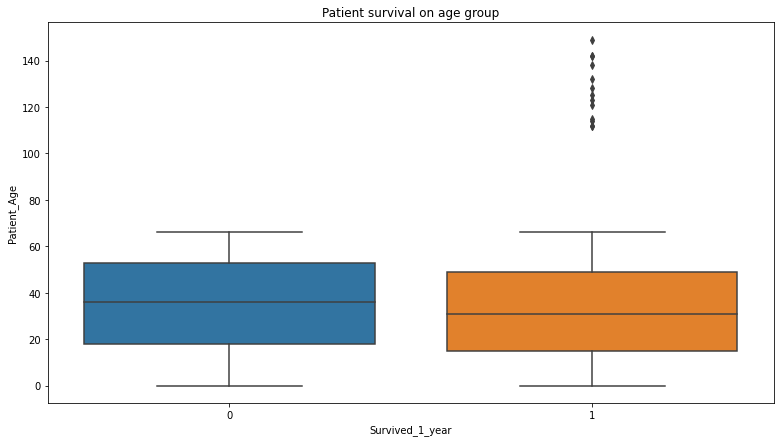

In [31]:
# Patient survival after one year in different age group
plt.figure(figsize=(13,7))
plt.title("Patient survival in different age group")
sns.boxplot(x ="Survived_1_year", y = "Patient_Age", data = pharma_data)
plt.show();

- Observation : In the age group we can see some outlier where many people have more than 100 years of age survive after one year treatment.

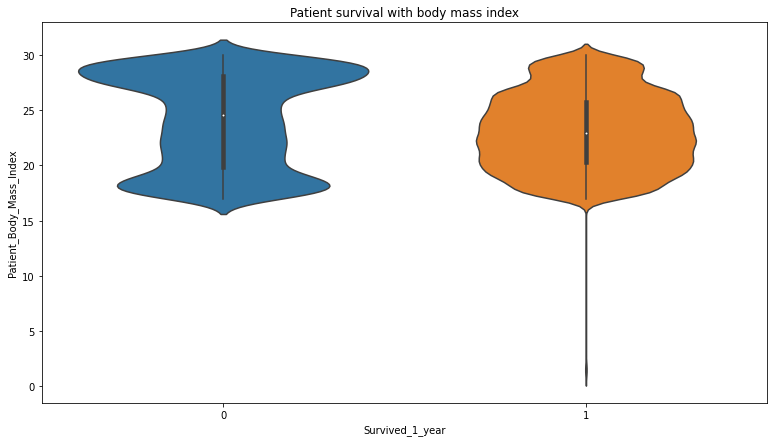

In [33]:
# Patient survival amount relationship with body mass index
plt.figure(figsize=(13,7))
plt.title("Patient survival with body mass index")
sns.violinplot(x ="Survived_1_year", y = "Patient_Body_Mass_Index", data = pharma_data)
plt.show();

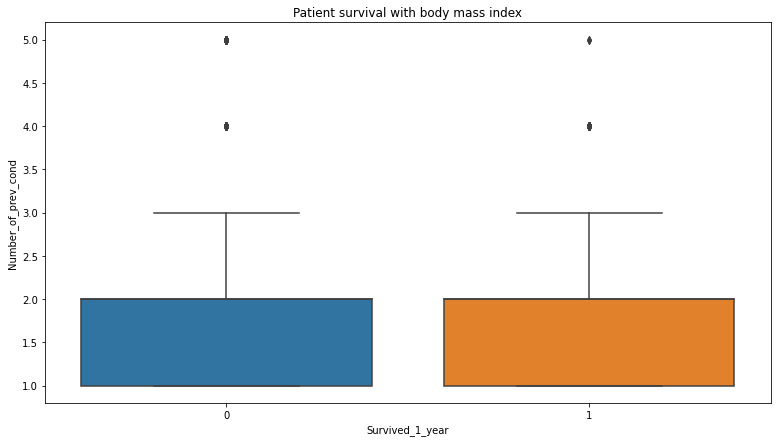

In [63]:
# Patient survival amount relationship with body mass index
plt.figure(figsize=(13,7))
plt.title("Patient survival with body mass index")
sns.boxplot(x ="Survived_1_year", y = "Number_of_prev_cond", data = pharma_data)
plt.show();

# Feature Engineering

In [64]:
# Data preprocessing
# drop all NAN values from datasets
pharma_data = pharma_data.dropna()
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [65]:
# check any dublicate values in dataset
pharma_data = pharma_data.drop_duplicates()
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [66]:
# Drop the columns that we will not use for feature engineering and then machine learning model building
pharma_data = pharma_data.drop(["Patient_ID", "Patient_mental_condition","ID_Patient_Care_Situation" ], axis = 1)
pharma_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,45,DX6,47,26.155120,YES,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [68]:
# performing categorical variable to numeric variable with label encoder to make uniform data

le = LabelEncoder()
pharma_data['Treated_with_drugs']= le.fit_transform(pharma_data['Treated_with_drugs'])
pharma_data['Patient_Smoker']= le.fit_transform(pharma_data['Patient_Smoker'])
pharma_data['Patient_Rural_Urban']= le.fit_transform(pharma_data['Patient_Rural_Urban'])

pharma_data.head()


,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,31,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,16,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,31,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,0,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,45,31,47,26.155120,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21849 entries, 0 to 23096
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      21849 non-null  int64  
 1   Treated_with_drugs       21849 non-null  int64  
 2   Patient_Age              21849 non-null  int64  
 3   Patient_Body_Mass_Index  21849 non-null  float64
 4   Patient_Smoker           21849 non-null  int64  
 5   Patient_Rural_Urban      21849 non-null  int64  
 6   A                        21849 non-null  float64
 7   B                        21849 non-null  float64
 8   C                        21849 non-null  float64
 9   D                        21849 non-null  float64
 10  E                        21849 non-null  float64
 11  F                        21849 non-null  float64
 12  Z                        21849 non-null  float64
 13  Number_of_prev_cond      21849 non-null  float64
 14  Survived_1_year       

- Observation: After label encoding and dropped missing values we have got clean data now.

# Now preparing test data as well for machine learning model

In [69]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
# summary
print("Rows     :",test_data.shape[0])
print("Columns  :",test_data.shape[1])
print("\nFeatures :\n",test_data.columns.tolist())
print("\nMissing Value    :",test_data.isnull().sum().sum())
print("\nColumns with missing value:\n",test_data.isnull().sum())

Rows     : 9303
Columns  : 17

Features :
 ['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond']

Missing Value    : 0

Columns with missing value:
 ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64


In [72]:
test_data = test_data.drop(["Patient_ID", "Patient_mental_condition","ID_Patient_Care_Situation" ], axis = 1)
test_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
test_data['Treated_with_drugs']= le.fit_transform(test_data['Treated_with_drugs'])
test_data['Patient_Smoker']= le.fit_transform(test_data['Patient_Smoker'])
test_data['Patient_Rural_Urban']= le.fit_transform(test_data['Patient_Rural_Urban'])

test_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,40,24,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,52,31,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,50,29,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,32,31,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,20,24,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Normalize the data

In [75]:
test_data = preprocessing.StandardScaler().fit(test_data).transform(test_data)
test_data[:5]

array([[ 0.8822645 ,  0.0648387 , -0.88561748,  1.59575713, -0.86279866,
        -0.65634635,  0.34567989, -0.40735191, -0.47353989, -0.30924209,
         1.22617225, -0.23630339,  0.        ,  0.3133378 ],
       [ 1.67712279,  0.76739463, -0.47487394,  0.90392856, -0.86279866,
         1.52358584,  0.34567989,  2.45487984, -0.47353989, -0.30924209,
        -0.8155461 , -0.23630339,  0.        ,  0.3133378 ],
       [ 1.54464641,  0.56666437,  1.52750086,  0.55555903, -0.86279866,
        -0.65634635,  0.34567989, -0.40735191, -0.47353989, -0.30924209,
         1.22617225, -0.23630339,  0.        ,  0.3133378 ],
       [ 0.35235898,  0.76739463,  0.44929905,  0.99276508, -0.86279866,
         1.52358584,  0.34567989, -0.40735191,  2.11175449, -0.30924209,
         1.22617225, -0.23630339,  0.        ,  1.61003779],
       [-0.44249931,  0.0648387 ,  0.86004259,  0.56429111, -0.86279866,
        -0.65634635,  0.34567989, -0.40735191, -0.47353989, -0.30924209,
        -0.8155461 , -0.23



```
# This is formatted as code
```

# Model building

In [76]:
#  create input and target variable
X = pharma_data.drop(['Survived_1_year'], axis = 1)
y = pharma_data['Survived_1_year']

In [78]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [79]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

## Logistic Regression

In [80]:
# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
# model performance on train dataset
pred_train = model.predict(X_train)
pred_train

array([1, 1, 1, ..., 0, 1, 1])

In [83]:
# Training accuracy and f1 score on train dataset
ac = accuracy_score(y_train, pred_train)
f_score = f1_score(y_train, pred_train)
print("accuracy = ", ac, ",", "f_score", f_score)

accuracy =  0.6975284425264809 , f_score 0.7764137264378927


In [85]:
# prediction on Xtest dataset
pred_test = model.predict(X_test)

In [86]:
# # Testing accuracy and f1 score on test dataset
ac = accuracy_score(y_test, pred_test)
f_score = f1_score(y_test, pred_test)
print("accuracy", ac, ",", "f_score", f_score)

accuracy 0.693211289092296 , f_score 0.7731528482797517


## Random forest Classifier

In [88]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

In [89]:
# Train the classifier
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [91]:
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rf_sfm = SelectFromModel(rf_clf)

# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)


In [92]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [93]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

In [94]:
y_pred = rf_clf.predict(X_test)
rf_ac = accuracy_score(y_test, y_pred)
rf_fscore = f1_score(y_test ,y_pred)

# View The Accuracy Of Our Full Feature (10 Features) Model
print("Baseline Model Accuracy:", rf_ac)
print("Baseline Model F1 Score:", rf_fscore)

Baseline Model Accuracy: 0.8051868802440885
Baseline Model F1 Score: 0.8411889068523816


In [95]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Model Accuracy:", rf_ac)
print("Limited Features Model F1 Score:", rf_fscore)

Limited Features Model Accuracy: 0.8051868802440885
Limited Features Model F1 Score: 0.8411889068523816


In [98]:
# prediction on new test data
survived_1_year= model.predict(test_data)
survived_1_year

array([1, 0, 1, ..., 1, 0, 1])

In [99]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(survived_1_year)
# res.index = test_data.index # its important for comparison
res.columns = ["Survived_1_year"]

# # To download the csv file locally
# from google.colab import files
# res.to_csv('Survival.csv')         
# files.download('Survival.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Results and Discussion:
This is a great project where I used my theoretical and practical knowledge on machine learning model building. The problem was a binary classification model. For binary classification best algorithm works with logistic regression. I also applied random forest classification model. I have found better result for random forestclassifier. Although machine learning model is a try and error , never ending story, it has always a room of improvement.
I could see in my dataset have outlier, if I remove outlier the result could be change in positive direction, also can use more other boosting algorithm like XGBoost, more hyperparameter tuning, confusion matrix and so on. Due to time limitation and guideline structure project I did as simple as possible where I touches each and every point for machine learning model building. I have preprocessed the raw data, feature engineering, Exploratory Data Analysis, Model building and hyperparameter tuning, testing accuracy anf finally prediction on unseen new test data with my best model here Random forestclassifier.

# Acknowledgement:
I am grateful to DPHI to give me that opportunity to do a datathon AI challenge project on real data by which I can gain knowledge and experience on machine learning.